# torch tensor operations - quick reference

Essential operations for daily PyTorch development.

This notebook provides a comprehensive reference for common PyTorch tensor operations, from basic creation to advanced techniques. This notebook covers PyTorch tensor operations including:

- **Tensor Creation**: Basic tensors, random tensors, and data type conversion
- **Tensor Manipulation**: Reshaping, indexing, and slicing
- **Mathematical Operations**: Arithmetic, matrix operations, and statistics
- **Gradient Operations**: Automatic differentiation and gradient computation
- **Device Operations**: CPU/GPU management
- **Advanced Operations**: Concatenation, stacking, permutation, masking, gather and scatter, etc.
- **Memory Optimization**: In-place operations, memory sharing, and gradient checkpointing
- **Time Series Operations**: Rolling windows, moving averages, and sequence handling
- **Performance Tips**: Best practices for efficient PyTorch usage
- **Debugging**: Tensor inspection and common issues
- **Practical Examples**: Time series normalization, attention mechanisms, and efficient matrix operations

Key highlights of advanced features:
1. Comprehensive time series processing with variable length sequences
2. Memory optimization techniques including gradient checkpointing
3. Efficient matrix operations for 2D tensors
4. Attention mechanism implementations with temperature scaling
5. Batch processing with automatic padding

Use these operations as building blocks for your PyTorch projects!


## 📚 Additional Resources

- [PyTorch Official Documentation](https://pytorch.org/docs/stable/tensors.html)
- [PyTorch Tutorials](https://pytorch.org/tutorials/)
- [PyTorch Forums](https://discuss.pytorch.org/)


In [1]:
# Import required libraries
import numpy as np
import torch
import torch.nn.functional as F

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")


PyTorch version: 2.7.1+cu126
CUDA available: False


## 1. Tensor Creation

Basic tensor creation methods and converting from other data types.


In [2]:
# Basic creation
x = torch.tensor([1, 2, 3, 4, 5])
print(f"Basic tensor: {x}")

x = torch.zeros(3, 4)  # 3x4 tensor of zeros
print(f"\nZeros tensor:\n{x}")

x = torch.ones(2, 3, 4)  # 2x3x4 tensor of ones
print(f"\nOnes tensor shape: {x.shape}")

x = torch.rand(2, 3)  # Random uniform values [0, 1)
print(f"\nRandom tensor [0,1):\n{x}")

x = torch.randn(2, 3)  # Random normal distribution
print(f"\nRandom normal tensor:\n{x}")

x = torch.arange(0, 10, 2)  # [0, 2, 4, 6, 8]
print(f"\nArange tensor: {x}")

x = torch.linspace(0, 1, 5)  # [0, 0.25, 0.5, 0.75, 1]
print(f"\nLinspace tensor: {x}")


Basic tensor: tensor([1, 2, 3, 4, 5])

Zeros tensor:
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

Ones tensor shape: torch.Size([2, 3, 4])

Random tensor [0,1):
tensor([[0.1194, 0.2106, 0.8968],
        [0.8892, 0.9525, 0.0849]])

Random normal tensor:
tensor([[ 1.4472, -1.2414, -2.0861],
        [-1.7649,  0.4259, -1.3894]])

Arange tensor: tensor([0, 2, 4, 6, 8])

Linspace tensor: tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


In [3]:
# From other data types
np_array = np.array([[1, 2, 3], [4, 5, 6]])
x = torch.from_numpy(np_array)  # From numpy
print(f"From numpy:\n{x}")

x = torch.tensor([1.0, 2.0], dtype=torch.float32)  # Specify dtype
print(f"\nWith specific dtype: {x}, dtype: {x.dtype}")


From numpy:
tensor([[1, 2, 3],
        [4, 5, 6]])

With specific dtype: tensor([1., 2.]), dtype: torch.float32


## 2. Tensor Manipulation

Reshaping, indexing, and slicing operations.


In [4]:
# Reshaping
x = torch.randn(2, 3, 4)
print(f"Original shape: {x.shape}")

y = x.reshape(6, 4)  # Reshape to 6x4
print(f"Reshaped to: {y.shape}")

y = x.view(6, 4)  # Same as reshape (shares memory with original)
print(f"Viewed to: {y.shape}")
y[0, 0] = 100
print(f"Original tensor after view: {x[0, 0, 0]}")

y = x.flatten()  # Flatten to 1D
print(f"Flattened to: {y.shape}")

y = x.squeeze()  # Remove dimensions of size 1
print(f"Squeezed shape: {y.shape}")

y = x.unsqueeze(0)  # Add dimension at index 0
print(f"Unsqueezed shape: {y.shape}")


Original shape: torch.Size([2, 3, 4])
Reshaped to: torch.Size([6, 4])
Viewed to: torch.Size([6, 4])
Original tensor after view: 100.0
Flattened to: torch.Size([24])
Squeezed shape: torch.Size([2, 3, 4])
Unsqueezed shape: torch.Size([1, 2, 3, 4])


In [5]:
# Example with squeeze and unsqueeze
x = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)

y = x.view((2, 1, 3, 1))

print(f"Original shape: {y.shape}: \n", y)

print(f"Squeezed shape: {y.squeeze().shape}: \n", y.squeeze())

print(f"Unsqueezed shape: {y.unsqueeze(0).shape}: \n", y.unsqueeze(0))


Original shape: torch.Size([2, 1, 3, 1]): 
 tensor([[[[1.],
          [2.],
          [3.]]],


        [[[4.],
          [5.],
          [6.]]]])
Squeezed shape: torch.Size([2, 3]): 
 tensor([[1., 2., 3.],
        [4., 5., 6.]])
Unsqueezed shape: torch.Size([1, 2, 1, 3, 1]): 
 tensor([[[[[1.],
           [2.],
           [3.]]],


         [[[4.],
           [5.],
           [6.]]]]])


In [6]:
# Indexing and slicing
x = torch.randn(3, 4)
print(f"Original tensor:\n{x}")

first_row = x[0]  # First row
print(f"\nFirst row: {first_row}")

first_element = x[0, 0]  # First element
print(f"\nFirst element: {first_element}")

slice_data = x[0:2, 1:3]  # Slice
print(f"\nSliced data:\n{slice_data}")

mask = x > 0  # Boolean mask
print(f"\nBoolean mask:\n{mask}")

positive_values = x[mask]  # Boolean indexing
print(f"\nPositive values: {positive_values}")  # returns a 1D tensor
# See masked_fill for dimension preserving boolean based filling

mask_1d_dim1 = torch.tensor([True, False, True, False])
preserved_mask = x[:, mask_1d_dim1]
print(f"\nPreserved mask (shape: {preserved_mask.shape}): {preserved_mask}")

mask_1d_dim0 = torch.tensor([True, False, True])
preserved_mask = x[mask_1d_dim0, :]
print(f"\nPreserved mask (shape: {preserved_mask.shape}): {preserved_mask}")


Original tensor:
tensor([[ 0.2044, -0.1893, -0.6891,  1.4666],
        [-0.7639, -0.4835,  1.1252,  0.3548],
        [-0.6136, -0.5048,  1.0846,  1.3272]])

First row: tensor([ 0.2044, -0.1893, -0.6891,  1.4666])

First element: 0.20436817407608032

Sliced data:
tensor([[-0.1893, -0.6891],
        [-0.4835,  1.1252]])

Boolean mask:
tensor([[ True, False, False,  True],
        [False, False,  True,  True],
        [False, False,  True,  True]])

Positive values: tensor([0.2044, 1.4666, 1.1252, 0.3548, 1.0846, 1.3272])

Preserved mask (shape: torch.Size([3, 2])): tensor([[ 0.2044, -0.6891],
        [-0.7639,  1.1252],
        [-0.6136,  1.0846]])

Preserved mask (shape: torch.Size([2, 4])): tensor([[ 0.2044, -0.1893, -0.6891,  1.4666],
        [-0.6136, -0.5048,  1.0846,  1.3272]])


In [7]:
# Indexing with tensors: these can also be done with int lists BUT gradients may not flow
x = torch.arange(3 * 4 * 2).view(3, 2, 4)
print(f"Original tensor:\n{x}")

indices = torch.tensor([0, 2])  # indices of dim 0
print(f"Indices:\n{indices}")

x_indexed = x[indices]
print(f"Indexed tensor: (shape: {x_indexed.shape})\n{x_indexed}")

custom_indexed = x[torch.tensor([0, 2, 1]), :, torch.tensor([1, 3, 0])]
print(f"Custom indexed tensor: (shape: {custom_indexed.shape})\n{custom_indexed}")


Original tensor:
tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23]]])
Indices:
tensor([0, 2])
Indexed tensor: (shape: torch.Size([2, 2, 4]))
tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23]]])
Custom indexed tensor: (shape: torch.Size([3, 2]))
tensor([[ 1,  5],
        [19, 23],
        [ 8, 12]])


In [8]:
# Ellipsis indexing
# Create a tensor of shape (2, 3, 4, 5)
x = torch.randn(2, 3, 4, 5)

# Use ellipsis for extended slicing
sliced_tensor = x[..., 1:3, :]
print(sliced_tensor.shape)  # Output: torch.Size([2, 3, 2, 5])


torch.Size([2, 3, 2, 5])


In [9]:
# Sorting operations
x = torch.randn(3, 4)
print(f"Original tensor:\n{x}")

# Sort along last dimension (default)
sorted_values, sorted_indices = torch.sort(x)  # argsort just returns the indices
print(f"\nSorted values:\n{sorted_values}")
print(f"Sorted indices:\n{sorted_indices}")

# Sort along specific dimension
sorted_values_dim0, sorted_indices_dim0 = torch.sort(x, dim=0)
print(f"\nSorted along dim=0:\n{sorted_values_dim0}")

# Sort in descending order
sorted_desc, indices_desc = torch.sort(x, descending=True)
print(f"\nSorted in descending order:\n{sorted_desc}")

# Top-k elements
k = 2
topk_values, topk_indices = torch.topk(x, k=k, dim=-1)
print(f"\nTop-{k} values:\n{topk_values}")
print(f"Top-{k} indices:\n{topk_indices}")

# Sort with stable sorting (maintains relative order of equal elements)
sorted_stable, indices_stable = torch.sort(x, stable=True)
print(f"\nStable sorted:\n{sorted_stable}")


Original tensor:
tensor([[ 0.7292,  1.5022, -0.7339, -0.8967],
        [-0.8604,  1.6959,  0.3635,  0.1129],
        [-2.4933,  0.1483,  2.0098, -1.0039]])

Sorted values:
tensor([[-0.8967, -0.7339,  0.7292,  1.5022],
        [-0.8604,  0.1129,  0.3635,  1.6959],
        [-2.4933, -1.0039,  0.1483,  2.0098]])
Sorted indices:
tensor([[3, 2, 0, 1],
        [0, 3, 2, 1],
        [0, 3, 1, 2]])

Sorted along dim=0:
tensor([[-2.4933,  0.1483, -0.7339, -1.0039],
        [-0.8604,  1.5022,  0.3635, -0.8967],
        [ 0.7292,  1.6959,  2.0098,  0.1129]])

Sorted in descending order:
tensor([[ 1.5022,  0.7292, -0.7339, -0.8967],
        [ 1.6959,  0.3635,  0.1129, -0.8604],
        [ 2.0098,  0.1483, -1.0039, -2.4933]])

Top-2 values:
tensor([[1.5022, 0.7292],
        [1.6959, 0.3635],
        [2.0098, 0.1483]])
Top-2 indices:
tensor([[1, 0],
        [1, 2],
        [2, 1]])

Stable sorted:
tensor([[-0.8967, -0.7339,  0.7292,  1.5022],
        [-0.8604,  0.1129,  0.3635,  1.6959],
        [-2.

### 2.a strides, views and contiguous

torch tensors are stored in row major order by default.

Viewing followed by transposing followed by viewing may be disallowed because you can only generate a view on a contiguous tensor.

A contiguous tensor is one whose memory is allocated as though it was created from scratch. eg. `[[1 2 3] [4 5 6]]` => `1 2 3 4 5 6` in memory.

Applying:
1. a view (eg. 3, 2) => `[[1 2] [3 4] [5 6]]`
2. a transpose => `[[1 3 5] [2 4 6]]`
3. try to apply a view for 3,2: will fail because on memory the data is still stored as `1 2 3 4 5 6`. The view would expect the data to be stored as `1 3 5 2 4 6` to work correctly.

Read up on a tensor's stride to understand better.

Ref: https://stackoverflow.com/questions/48915810/what-does-contiguous-do-in-pytorch


In [10]:
# Step 1: Create original tensor
original = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)
print("Original tensor:")
print(original)
print(f"Strides (memory layout): {original.stride()}")
print(f"Underlying storage: {original.storage().tolist()}")
print(f"Is contiguous: {original.is_contiguous()}")
print()

# Step 2: Apply view (3, 2)
viewed = original.view(3, 2)
print("After view(3, 2):")
print(viewed)
print(f"Strides (memory layout): {viewed.stride()}")
print(f"Underlying storage: {viewed.storage().tolist()}")
print(f"Is contiguous: {viewed.is_contiguous()}")
print()

# Step 3: Apply transpose
transposed = viewed.transpose(0, 1)
print("After transpose(0, 1):")
print(transposed)
print(f"Strides (memory layout): {transposed.stride()}")
print(
    f"Underlying storage: {transposed.storage().tolist()}"
)  # Note how it is not is row major order anymore w.r.t underlying storage.
print(f"Is contiguous: {transposed.is_contiguous()}")
print()

# Step 4: Try to apply view again - THIS WILL FAIL
print("Trying to apply view(3, 2) to transposed tensor:")
try:
    final_view = transposed.view(3, 2)
    print("Success!")
except RuntimeError as e:
    print(f"Error: {e}")
print()

# Step 5: Solutions
print("Use contiguous() first:")
contiguous_transposed = transposed.contiguous()
try:
    solution1 = contiguous_transposed.view(3, 2)
    print("view() works after contiguous()")
    print(solution1)
    print(f"Strides (memory layout): {solution1.stride()}")
    print(f"Underlying storage: {solution1.storage().tolist()}")
    print(f"Is contiguous: {solution1.is_contiguous()}")
except RuntimeError as e:
    print(f"Still fails: {e}")

# other solutions: clone, reshape


Original tensor:
tensor([[1., 2., 3.],
        [4., 5., 6.]])
Strides (memory layout): (3, 1)
Underlying storage: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
Is contiguous: True

After view(3, 2):
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
Strides (memory layout): (2, 1)
Underlying storage: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
Is contiguous: True

After transpose(0, 1):
tensor([[1., 3., 5.],
        [2., 4., 6.]])
Strides (memory layout): (1, 2)
Underlying storage: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
Is contiguous: False

Trying to apply view(3, 2) to transposed tensor:
Error: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

Use contiguous() first:
view() works after contiguous()
tensor([[1., 3.],
        [5., 2.],
        [4., 6.]])
Strides (memory layout): (2, 1)
Underlying storage: [1.0, 3.0, 5.0, 2.0, 4.0, 6.0]
Is contiguous: True


/tmp/ipykernel_230730/373637974.py:6: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print(f"Underlying storage: {original.storage().tolist()}")


### 2.b shared vs. cloned memory summary

| Operation Category | Shared Memory Operations | Cloned Operations |
|------------------|-------------------------|-------------------|
| Tensor Creation | `torch.from_numpy(array)` | `torch.tensor(data)` |
| | `torch.as_tensor(data)` | `torch.zeros(shape)` |
| | | `torch.ones(shape)` |
| | | `torch.randn(shape)` |
| | | `torch.arange(start, end, step)` |
| | | `torch.linspace(start, end, steps)` |
| Reshaping | `tensor.view(shape)` | `tensor.reshape(shape)` |
| | `tensor.view_as(other)` | `tensor.reshape_as(other)` |
| | `tensor.flatten()`* | `tensor.clone().flatten()` |
| | `tensor.squeeze()` | `tensor.squeeze().clone()` |
| | `tensor.unsqueeze(dim)` | `tensor.unsqueeze(dim).clone()` |
| Indexing & Slicing | `tensor[index]` | `tensor[index].clone()` |
| | `tensor[start:end]` | `tensor[start:end].clone()` |
| | `tensor[mask]` | `tensor[mask].clone()` |
| Sorting | `tensor.sort(dim)` | `tensor.sort(dim).clone()` |
| | `tensor.topk(k, dim)` | `tensor.topk(k, dim).clone()` |
| Mathematical Operations | `tensor.add_(value)` | `tensor.add(value)` |
| | `tensor.mul_(value)` | `tensor.mul(value)` |
| | `tensor.zero_()` | `torch.zeros_like(tensor)` |
| | `tensor.fill_(value)` | `tensor.clone().fill_(value)` |
| Transposition | `tensor.transpose(dim1, dim2)` | `tensor.transpose(dim1, dim2).clone()` |
| | `tensor.permute(dims)` | `tensor.permute(dims).clone()` |
| | `tensor.T` | `tensor.T.clone()` |
| Gradient Operations | `tensor.detach()` | `tensor.detach().clone()` |
| Memory Management | - ** | `tensor.contiguous()` |
| | `tensor.storage()` | `tensor.storage().clone()` |
| Advanced Operations | `tensor.gather(dim, index)` | `tensor.gather(dim, index).clone()` |
| | `tensor.scatter_(dim, index, src)` | `tensor.scatter(dim, index, src)` |
| | `tensor.masked_fill_(mask, value)` | `tensor.masked_fill(mask, value)` |
| | `tensor.masked_select(mask)` | `tensor.masked_select(mask).clone()` |

\* flatten returns original if already flat, view if contiguous and flattened clone if non-contiguous  
\*\* if already contiguous, share


In [11]:
# Verifying whether a tensor is a view of another tensor
a = torch.tensor([[1, 2, 3], [4, 5, 6]])

b = a.clone().fill_(2)
c = a.fill_(2)
a.fill_(3)
print(f"Is b a view of a? {b._base is a or b is a}")
print(f"Is c a view of a? {c._base is a or c is a}")

print(a, b, c, sep="\n")


Is b a view of a? False
Is c a view of a? True
tensor([[3, 3, 3],
        [3, 3, 3]])
tensor([[2, 2, 2],
        [2, 2, 2]])
tensor([[3, 3, 3],
        [3, 3, 3]])


## 3. Mathematical Operations

Basic arithmetic, matrix operations, and statistical functions.

> Broadcasting primer:
> * if number of dimensions of the two tensors are different, prepend 1s to the dimension of the tensor with fewer dimensions until they are the same.
> * start the check from right to left
> * if the dimensions are not equal, and one of them is 1, the tensor with dimension 1 is broadcasted to the dimension of the other tensor.
> * i.e values of other dimensions are repeated in this dimension to match the value of this dimension of the other tensor.
> * if the dimensions are not equal, and one of them is not 1, the tensors are not broadcastable.


In [12]:
# Broadcasting semantics
print("Broadcasting Semantics Examples:")
print("=" * 50)

# Example 1: Same shapes are always broadcastable
x = torch.empty(5, 7, 3)
y = torch.empty(5, 7, 3)
print("Example 1 - Same shapes (5,7,3):")
print(f"x.shape: {x.shape}, y.shape: {y.shape}")
# Same shapes are always broadcastable (i.e. the above rules always hold)
try:
    result = x + y
    print("Broadcastable: True (same shapes)")
    print(f"Result shape: {result.shape}\n")
except RuntimeError as e:
    print(f"Broadcastable: False - {e}\n")

# Example 2: Empty tensor with insufficient dimensions
x = torch.empty((0,))
y = torch.empty(2, 2)
print("Example 2 - Empty tensor:")
print(f"x.shape: {x.shape}, y.shape: {y.shape}")
# x and y are not broadcastable, because x does not have at least 1 dimension
try:
    result = x + y
    print("Broadcastable: True")
    print(f"Result shape: {result.shape}\n")
except RuntimeError as e:
    print(f"Broadcastable: False - {e}\n")

# Example 3: Trailing dimensions can line up
x = torch.empty(5, 3, 4, 1)
y = torch.empty(3, 1, 1)
print("Example 3 - Trailing dimensions alignment:")
print(f"x.shape: {x.shape}, y.shape: {y.shape}")
# x and y are broadcastable.
# 1st trailing dimension: both have size 1
# 2nd trailing dimension: y has size 1
# 3rd trailing dimension: x size == y size
# 4th trailing dimension: y dimension doesn't exist
try:
    result = x + y
    print("Broadcastable: True")
    print(f"Result shape: {result.shape}\n")
except RuntimeError as e:
    print(f"Broadcastable: False - {e}\n")

# Example 4: Mismatched trailing dimensions
x = torch.empty(5, 2, 4, 1)
y = torch.empty(3, 1, 1)
print("Example 4 - Mismatched dimensions:")
print(f"x.shape: {x.shape}, y.shape: {y.shape}")
# x and y are not broadcastable, because in the 3rd trailing dimension 2 != 3
try:
    result = x + y
    print("Broadcastable: True")
    print(f"Result shape: {result.shape}\n")
except RuntimeError as e:
    print(f"Broadcastable: False - {e}\n")

# Example 5: Practical broadcasting demonstration
a = torch.tensor([[1, 2, 3], [4, 5, 6]])  # Shape: (2, 3)
b = torch.tensor([10, 20, 30])  # Shape: (3,)
print("Example 5 - Practical broadcasting:")
print(f"a.shape: {a.shape}, b.shape: {b.shape}")
print(f"a:\n{a}")
print(f"b: {b}")
try:
    result = a + b
    print(f"a + b (broadcasted):\n{result}")
except RuntimeError as e:
    print(f"Broadcasting failed: {e}")


Broadcasting Semantics Examples:
Example 1 - Same shapes (5,7,3):
x.shape: torch.Size([5, 7, 3]), y.shape: torch.Size([5, 7, 3])
Broadcastable: True (same shapes)
Result shape: torch.Size([5, 7, 3])

Example 2 - Empty tensor:
x.shape: torch.Size([0]), y.shape: torch.Size([2, 2])
Broadcastable: False - The size of tensor a (0) must match the size of tensor b (2) at non-singleton dimension 1

Example 3 - Trailing dimensions alignment:
x.shape: torch.Size([5, 3, 4, 1]), y.shape: torch.Size([3, 1, 1])
Broadcastable: True
Result shape: torch.Size([5, 3, 4, 1])

Example 4 - Mismatched dimensions:
x.shape: torch.Size([5, 2, 4, 1]), y.shape: torch.Size([3, 1, 1])
Broadcastable: False - The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

Example 5 - Practical broadcasting:
a.shape: torch.Size([2, 3]), b.shape: torch.Size([3])
a:
tensor([[1, 2, 3],
        [4, 5, 6]])
b: tensor([10, 20, 30])
a + b (broadcasted):
tensor([[11, 22, 33],
        [14, 25, 36]])


In [13]:
# Basic arithmetic
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])
print(f"Matrix A:\n{a}")
print(f"\nMatrix B:\n{b}")

c = a + b  # Element-wise addition
print(f"\nA + B:\n{c}")

c = a - b  # Element-wise subtraction
print(f"\nA - B:\n{c}")

c = a * b  # Element-wise multiplication
print(f"\nA * B (element-wise):\n{c}")

c = a / b  # Element-wise division
print(f"\nA / B:\n{c}")

c = a**2  # Element-wise power
print(f"\nA^2:\n{c}")


Matrix A:
tensor([[1, 2],
        [3, 4]])

Matrix B:
tensor([[5, 6],
        [7, 8]])

A + B:
tensor([[ 6,  8],
        [10, 12]])

A - B:
tensor([[-4, -4],
        [-4, -4]])

A * B (element-wise):
tensor([[ 5, 12],
        [21, 32]])

A / B:
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])

A^2:
tensor([[ 1,  4],
        [ 9, 16]])


In [14]:
# Matrix operations
c = torch.matmul(a, b)  # Matrix multiplication
print(f"Matrix multiplication (matmul):\n{c}")

c = a @ b  # Alternative syntax
print(f"\nMatrix multiplication (@):\n{c}")

c = torch.mm(a, b)  # 2D matrix multiplication (more efficient but does not broadcast)
print(f"\nMatrix multiplication (mm):\n{c}")


Matrix multiplication (matmul):
tensor([[19, 22],
        [43, 50]])

Matrix multiplication (@):
tensor([[19, 22],
        [43, 50]])

Matrix multiplication (mm):
tensor([[19, 22],
        [43, 50]])


In [15]:
# Edge cases
x = torch.tensor([1, 2, 3], dtype=torch.float32)
print(x)
print(
    x * x,  # Element-wise multiplication
    x @ x,  # Dot product
    x
    @ torch.tensor(
        [[1, 1], [2, 2], [3, 3]], dtype=torch.float32
    ),  # Matrix multiplication
)


tensor([1., 2., 3.])
tensor([1., 4., 9.]) tensor(14.) tensor([14., 14.])


### Matrix Multiplication Broadcasting Compatibility:

Input Tensors:
- **Input tensor**: $(j \times 1 \times n \times m)$
- **Other tensor**: $(k \times m \times p)$

These inputs are valid for broadcasting even though the final two dimensions (i.e., the matrix dimensions) are different.

Output Tensor: The result will be a $(j \times k \times n \times p)$ tensor.


In [16]:
# Statistical operations
x = torch.randn(3, 4)
print(f"Random tensor:\n{x}")

mean_val = x.mean()
sum_val = x.sum()
max_val = x.max()
min_val = x.min()
std_val = x.std()
index_of_max = x.argmax()
index_of_min = x.argmin()

print(f"\nMean: {mean_val:.4f}")
print(f"Sum: {sum_val:.4f}")
print(f"Max: {max_val:.4f}")
print(f"Min: {min_val:.4f}")
print(f"Std: {std_val:.4f}")
print(f"Index of max: {index_of_max}")
print(f"Index of min: {index_of_min}")

# Reduction operations
row_sums = x.sum(dim=0)  # Sum along rows
col_sums = x.sum(dim=1)  # Sum along columns
row_means = x.mean(dim=0, keepdim=True)  # Keep dimensions

print(f"\nRow sums (shape: {row_sums.shape}): {row_sums}")
print(f"Column sums (shape: {col_sums.shape}): {col_sums}")
print(f"Row means (shape: {row_means.shape}):\n{row_means}")


Random tensor:
tensor([[-1.6610, -0.2457, -0.8091, -1.2305],
        [-0.9549,  0.8365, -0.1621,  1.7332],
        [-2.1960, -0.2678,  0.5435, -0.9055]])

Mean: -0.4433
Sum: -5.3194
Max: 1.7332
Min: -2.1960
Std: 1.0988
Index of max: 7
Index of min: 8

Row sums (shape: torch.Size([4])): tensor([-4.8119,  0.3229, -0.4276, -0.4029])
Column sums (shape: torch.Size([3])): tensor([-3.9463,  1.4527, -2.8258])
Row means (shape: torch.Size([1, 4])):
tensor([[-1.6040,  0.1076, -0.1425, -0.1343]])


## 4. Gradient Operations

Automatic differentiation and gradient computation.


In [17]:
# Automatic differentiation
x = torch.tensor([2.0, 3.0], requires_grad=True)
print(f"Input tensor: {x}")
print(f"Requires grad: {x.requires_grad}")

y = x**2 + 3 * x + 1
print("\nFunction: y = x^2 + 3x + 1")
print(f"Output: {y}")

y.backward(torch.ones_like(y))  # Compute gradients
gradients = x.grad  # Access gradients
print(f"\nGradients: {gradients}")

x.grad.zero_()  # Zero gradients
print(f"\nGradients after zeroing: {x.grad}")


Input tensor: tensor([2., 3.], requires_grad=True)
Requires grad: True

Function: y = x^2 + 3x + 1
Output: tensor([11., 19.], grad_fn=<AddBackward0>)

Gradients: tensor([7., 9.])

Gradients after zeroing: tensor([0., 0.])


In [18]:
# No gradient computation
with torch.no_grad():
    y = x**2  # No gradients computed
    print(f"Computed without gradients: {y}")
    print(f"y.requires_grad: {y.requires_grad}")


Computed without gradients: tensor([4., 9.])
y.requires_grad: False


## 5. Device Operations

Moving tensors between CPU and GPU.


In [19]:
# Device management
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

x = torch.randn(3, 3)
print(f"\nOriginal tensor device: {x.device}")

x_gpu = x.to(device)  # Move to GPU
print(f"\nMoved to device: {x_gpu.device}")

x_cpu = x_gpu.cpu()  # Move to CPU
print(f"\nMoved back to CPU: {x_cpu.device}")


Using device: cpu

Original tensor device: cpu

Moved to device: cpu

Moved back to CPU: cpu


## 6. Concatenation and Stacking

Combining tensors along different dimensions.

stack can also be used for interleaving different tensors: see dim=-1 stacking and then reshape.
Better way is to use einops.
https://discuss.pytorch.org/t/how-to-interleave-two-tensors-along-certain-dimension/11332/6


In [20]:
# Concatenation
a = torch.randn(2, 3)
b = torch.randn(2, 3)
c = torch.randn(2, 3)

print(f"Tensor A:\n{a}")
print(f"\nTensor B:\n{b}")
print(f"\nTensor C:\n{c}")

concat_vertical = torch.cat([a, b, c], dim=0)  # Stack vertically
print(f"\nVertical concatenation (dim=0):\n{concat_vertical}")
print(f"Shape: {concat_vertical.shape}")

concat_horizontal = torch.cat([a, b, c], dim=1)  # Stack horizontally
print(f"\nHorizontal concatenation (dim=1):\n{concat_horizontal}")
print(f"Shape: {concat_horizontal.shape}")

# Stacking (adds new dimension)
stacked = torch.stack([a, b, c], dim=0)  # Shape: (3, 2, 3)
print(f"\nStacked (dim=0):\n{stacked}")
print(f"Shape: {stacked.shape}")

stacked = torch.stack([a, b, c], dim=1)  # Shape: (2, 3, 3)
print(f"\nStacked (dim=1):\n{stacked}")
print(f"Shape: {stacked.shape}")

stacked = torch.stack([a, b, c], dim=2)  # Shape: (2, 3, 3)
print(f"\nStacked (dim=2):\n{stacked}")
print(f"Shape: {stacked.shape}")

# Repeat interleaving
# Same number of repeats:
interleaved0 = a.repeat_interleave(2, dim=0)
print(f"Interleaved (dim=0):\n{interleaved0}")
print(f"Shape: {interleaved0.shape}")

# Different dimension:
interleaved1 = a.repeat_interleave(2, dim=1)
print(f"Interleaved (dim=1):\n{interleaved1}")
print(f"Shape: {interleaved1.shape}")

# Different number of repeats:
interleaved_custom = a.repeat_interleave(torch.tensor([1, 2, 3]), dim=1)
print(f"Interleaved (dim=1):\n{interleaved_custom}")
print(f"Shape: {interleaved_custom.shape}")


Tensor A:
tensor([[ 0.2589,  0.2876,  1.2405],
        [-0.1860, -0.7719, -1.3606]])

Tensor B:
tensor([[-0.1713, -1.3692,  0.3214],
        [-1.2022, -2.3234,  0.1630]])

Tensor C:
tensor([[ 0.9134, -0.3114,  0.6402],
        [ 0.4092,  1.0252,  0.4815]])

Vertical concatenation (dim=0):
tensor([[ 0.2589,  0.2876,  1.2405],
        [-0.1860, -0.7719, -1.3606],
        [-0.1713, -1.3692,  0.3214],
        [-1.2022, -2.3234,  0.1630],
        [ 0.9134, -0.3114,  0.6402],
        [ 0.4092,  1.0252,  0.4815]])
Shape: torch.Size([6, 3])

Horizontal concatenation (dim=1):
tensor([[ 0.2589,  0.2876,  1.2405, -0.1713, -1.3692,  0.3214,  0.9134, -0.3114,
          0.6402],
        [-0.1860, -0.7719, -1.3606, -1.2022, -2.3234,  0.1630,  0.4092,  1.0252,
          0.4815]])
Shape: torch.Size([2, 9])

Stacked (dim=0):
tensor([[[ 0.2589,  0.2876,  1.2405],
         [-0.1860, -0.7719, -1.3606]],

        [[-0.1713, -1.3692,  0.3214],
         [-1.2022, -2.3234,  0.1630]],

        [[ 0.9134, -0.311

## 7. Permutation and Transposition

Rearranging tensor dimensions.


In [21]:
# Permutation and transposition examples
x = torch.randn(2, 3, 4)
print(f"Original tensor shape: {x.shape}")

transposed = x.transpose(0, 1)  # Swap dimensions 0 and 1
print(f"\nTransposed (0,1) shape: {transposed.shape}")

permuted = x.permute(2, 0, 1)  # Reorder dimensions
print(f"\nPermuted (2,0,1) shape: {permuted.shape}")


Original tensor shape: torch.Size([2, 3, 4])

Transposed (0,1) shape: torch.Size([3, 2, 4])

Permuted (2,0,1) shape: torch.Size([4, 2, 3])


## 8. Gather and Scatter

Gather and scatter operations for advanced tensor manipulation.

Gather: 
say you have a tensor x of shape (k, l, m, n). If the tensor is being gathered along dim=2,
the dimension of output tensor will be (k, l, p, n) where p can take any value.
This dimension will be identical to the dimension of indices.
The values of indices must be in the range [0, m-1].

https://stackoverflow.com/a/67623659

Scatter: inverse of gather. The index specifies the location of the values 
in the output tensor that a particular value in the input tensor will be placed.
The values of indices must be in the range [0, p-1].

https://yuyangyy.medium.com/understand-torch-scatter-b0fd6275331c


In [22]:
# Gather operation
# Create an input tensor with 3 rows and 2 columns
x = torch.tensor([[10, 11], [20, 21], [30, 31]])
print(f"Input tensor x (3 rows, 2 columns):\n{x}")

# Example 1: Gather along dim=1 (columns)
# The index tensor will have the same number of rows as x (3),
# and the number of columns will determine how many elements are gathered per row.
# Here, we want to gather 2 elements from each row.
indices_dim1 = torch.tensor(
    [
        [0, 1],  # For row 0 of x, pick column 0 and column 1
        [1, 0],  # For row 1 of x, pick column 1 and column 0
        [0, 0],  # For row 2 of x, pick column 0 and column 0
    ]
)

print(f"Index tensor for dim=1 (3 rows, 2 columns):\n{indices_dim1}")

# The output will have the same shape as indices_dim1 (3, 2).
gathered_along_dim1 = torch.gather(x, dim=1, index=indices_dim1)
print(
    f"Gathered tensor along dim=1 (shape {gathered_along_dim1.shape}):\n{gathered_along_dim1}"
)

# Explanation for Example 1:
# For the first row of 'x' ([10, 11]) and first row of 'indices_dim1' ([0, 1]):
#   - We pick the element at index 0 (which is 10) and index 1 (which is 11).
#   - The first row of the output is [10, 11].
# For the second row of 'x' ([20, 21]) and second row of 'indices_dim1' ([1, 0]):
#   - We pick the element at index 1 (which is 21) and index 0 (which is 20).
#   - The second row of the output is [21, 20].
# This process repeats for each row.

# Example 2: Gather along dim=0 (rows)
# The index tensor will have the same number of columns as x (2),
# and the number of rows will determine how many elements are gathered per column.
# Here, we want to gather 2 elements from each column.
indices_dim0 = torch.tensor(
    [
        [
            0,
            1,
        ],  # For column 0 of x, pick row 0 and row 1. For column 1 pick row 0 and row 1
        [
            2,
            0,
        ],  # For column 0 of x, pick row 2 and row 0. For column 1 pick row 2 and row 0
    ]
)

print(f"Index tensor for dim=0 (2 rows, 2 columns):\n{indices_dim0}")

# Gather elements along dimension 0 (rows)
# The output will have the same shape as indices_dim0 (2, 2).
gathered_along_dim0 = torch.gather(x, dim=0, index=indices_dim0)
print(
    f"Gathered tensor along dim=0 (shape {gathered_along_dim0.shape}):\n{gathered_along_dim0}"
)

# Explanation for Example 2:
# For the first column of 'x' ([10, 20, 30]) and first column of 'indices_dim0' ([0, 2]):
#   - We pick the element at index 0 (which is 10) and index 2 (which is 30).
#   - The first column of the output is [10, 30].
# For the second column of 'x' ([11, 21, 31]) and second column of 'indices_dim0' ([1, 0]):
#   - We pick the element at index 1 (which is 21) and index 0 (which is 11).
#   - The second column of the output is [21, 11].
# This process repeats for each column.


Input tensor x (3 rows, 2 columns):
tensor([[10, 11],
        [20, 21],
        [30, 31]])
Index tensor for dim=1 (3 rows, 2 columns):
tensor([[0, 1],
        [1, 0],
        [0, 0]])
Gathered tensor along dim=1 (shape torch.Size([3, 2])):
tensor([[10, 11],
        [21, 20],
        [30, 30]])
Index tensor for dim=0 (2 rows, 2 columns):
tensor([[0, 1],
        [2, 0]])
Gathered tensor along dim=0 (shape torch.Size([2, 2])):
tensor([[10, 21],
        [30, 11]])


In [23]:
# Scatter operation (inverse of gather)
# Create a tensor to scatter values into
scattered = torch.zeros_like(x)
values = torch.tensor([[100, 101], [200, 201], [300, 301]])
print(f"Values to scatter:\n{values}")

# Scatter values using the same indices as gather
scattered.scatter_(1, indices_dim1, values)
print(f"Scattered tensor (shape {scattered.shape}):\n{scattered}")

# Explanation for scatter:
# For the first row, indices_dim1[0] = [0, 1] and values[0] = [100, 101]:
#   - Place 100 at position 0 and 101 at position 1 in scattered[0]
#   - Result: scattered[0] = [100, 101]
# For the second row, indices_dim1[1] = [1, 0] and values[1] = [200, 201]:
#   - Place 200 at position 1 and 201 at position 0 in scattered[1]
#   - Result: scattered[1] = [201, 200]
# This process repeats for each row.


Values to scatter:
tensor([[100, 101],
        [200, 201],
        [300, 301]])
Scattered tensor (shape torch.Size([3, 2])):
tensor([[100, 101],
        [201, 200],
        [301,   0]])


## 9. Masked Operations

Working with boolean masks for conditional operations.


In [24]:
# Masked fill
x = torch.randn(3, 4)
mask = x > 0
print(f"Original tensor:\n{x}")
print(f"\nMask (x > 0):\n{mask}")

masked_tensor = x.masked_fill(mask, 0)
print(f"\nMasked fill (positive values set to 0):\n{masked_tensor}")

# Masked select
selected = x.masked_select(mask)
print(f"\nSelected positive values: {selected}")

# Custom filling: can fill with anything
# where mask is true, fill with x, otherwise fill with -inf
big_negative = torch.full_like(
    x, float("-inf")
)  # note that the size of the tensor is the same as x and it can contain any value
custom_filled = torch.where(mask, x, big_negative)
print(f"\nCustom filled (where mask is True, keep x; else -inf):\n{custom_filled}")


Original tensor:
tensor([[-0.8298,  1.5096, -1.4556,  0.5961],
        [ 0.6852, -0.0684, -0.8884, -0.4328],
        [-0.8599, -0.3564, -1.1568, -1.1360]])

Mask (x > 0):
tensor([[False,  True, False,  True],
        [ True, False, False, False],
        [False, False, False, False]])

Masked fill (positive values set to 0):
tensor([[-0.8298,  0.0000, -1.4556,  0.0000],
        [ 0.0000, -0.0684, -0.8884, -0.4328],
        [-0.8599, -0.3564, -1.1568, -1.1360]])

Selected positive values: tensor([1.5096, 0.5961, 0.6852])

Custom filled (where mask is True, keep x; else -inf):
tensor([[  -inf, 1.5096,   -inf, 0.5961],
        [0.6852,   -inf,   -inf,   -inf],
        [  -inf,   -inf,   -inf,   -inf]])


## 10. Memory Optimization

In-place operations and memory sharing techniques.


In [25]:
# In-place operations (save memory)
x = torch.randn(3, 3)
print(f"Original tensor:\n{x}")

x.add_(1)  # In-place addition
print(f"\nAfter add_(1):\n{x}")

x.mul_(2)  # In-place multiplication
print(f"\nAfter mul_(2):\n{x}")

x.zero_()  # Fill with zeros
print(f"\nAfter zero_():\n{x}")

# Memory sharing
x = torch.randn(3, 3)
y = x.view(-1)  # Shares memory with x
z = x.clone()  # Creates new memory

print(f"\nx.data_ptr(): {x.data_ptr()}")
print(f"y.data_ptr(): {y.data_ptr()}")
print(f"z.data_ptr(): {z.data_ptr()}")
print(f"\nx and y share memory: {x.data_ptr() == y.data_ptr()}")
print(f"x and z share memory: {x.data_ptr() == z.data_ptr()}")

# Memory sharing demonstration
y = x.view(-1)  # Shares memory with x
z = x.clone()  # Creates new memory
print(f"y shares memory with x: {y.storage().data_ptr() == x.storage().data_ptr()}")
print(f"z shares memory with x: {z.storage().data_ptr() == x.storage().data_ptr()}")


Original tensor:
tensor([[-0.7810,  0.4403, -0.2016],
        [-2.0480, -0.1610, -0.5502],
        [-1.0784,  0.9514,  2.6551]])

After add_(1):
tensor([[ 0.2190,  1.4403,  0.7984],
        [-1.0480,  0.8390,  0.4498],
        [-0.0784,  1.9514,  3.6551]])

After mul_(2):
tensor([[ 0.4380,  2.8805,  1.5967],
        [-2.0960,  1.6781,  0.8997],
        [-0.1568,  3.9028,  7.3103]])

After zero_():
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

x.data_ptr(): 707896192
y.data_ptr(): 707896192
z.data_ptr(): 707856896

x and y share memory: True
x and z share memory: False
y shares memory with x: True
z shares memory with x: False


In [26]:
# Gradient checkpointing example
def checkpoint_function(x):
    return torch.nn.functional.relu(x)


# Example of using gradient checkpointing
x = torch.randn(1000, 1000, requires_grad=True)
y = checkpoint_function(x)  # Memory efficient forward pass

# Note: In practice, gradient checkpointing would be used with torch.utils.checkpoint
# Example usage in a neural network:
"""
class MyModel(nn.Module):
    def forward(self, x):
        return torch.utils.checkpoint.checkpoint(self.expensive_layer, x)
"""

print(f"Output shape with checkpointing: {y.shape}")


Output shape with checkpointing: torch.Size([1000, 1000])


## 12. Performance Tips

Best practices for efficient PyTorch usage. Also see memory optimization section.


In [ ]:
# Use appropriate data types
x = torch.tensor([1, 2, 3], dtype=torch.float32)  # Specify dtype
print(f"\nData type: {x.dtype}")

# Use efficient operations
A = torch.randn(100, 200)
B = torch.randn(200, 300)
result = torch.mm(A, B)  # For 2D matrices
print(f"\nMatrix multiplication result shape: {result.shape}")

# Use torch.no_grad() for inference
with torch.no_grad():
    # predictions = model(input_data)  # Example usage
    pass
print("\nInference completed without gradient computation")



Data type: torch.float32

Matrix multiplication result shape: torch.Size([100, 300])

Inference completed without gradient computation


## 13. Debugging Tensors

Useful debugging techniques and tensor inspection.


In [ ]:
# Check tensor properties
x = torch.randn(3, 4)
print(f"Shape: {x.shape}")
print(f"Device: {x.device}")
print(f"Data type: {x.dtype}")
print(f"Requires grad: {x.requires_grad}")
print(f"Memory usage: {x.element_size() * x.nelement()} bytes")

# Check for NaN or Inf
has_nan = torch.isnan(x).any()
has_inf = torch.isinf(x).any()
print(f"\nHas NaN: {has_nan}")
print(f"Has Inf: {has_inf}")

# Create tensor with NaN to demonstrate
x_with_nan = torch.tensor([1.0, float("nan"), 3.0])
has_nan = torch.isnan(x_with_nan).any()
print(f"\nTensor with NaN: {x_with_nan}")
print(f"Has NaN: {has_nan}")


Shape: torch.Size([3, 4])
Device: cpu
Data type: torch.float32
Requires grad: False
Memory usage: 48 bytes

Has NaN: False
Has Inf: False

Tensor with NaN: tensor([1., nan, 3.])
Has NaN: True


## 14. Common Mistakes to Avoid

Important pitfalls and best practices.


In [ ]:
# 1. Forgetting to zero gradients
x = torch.tensor([2.0], requires_grad=True)
y = x**2
y.backward()
print(f"Gradient before zeroing: {x.grad}")
x.grad.zero_()  # Always zero gradients before backward pass
print(f"Gradient after zeroing: {x.grad}")

# 2. Using in-place operations on tensors that require gradients
x = torch.tensor([1.0], requires_grad=True)
print(f"\nOriginal requires_grad: {x.requires_grad}")
# x.add_(1)  # This will cause issues if x.requires_grad=True
print("Avoid in-place operations on tensors requiring gradients")

# 3. Not using torch.no_grad() for inference
with torch.no_grad():
    # predictions = model(input_data)
    pass
print("\nUse torch.no_grad() for inference")

# 4. Creating tensors on wrong device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x = torch.randn(3, 3).to(device)  # Move to correct device
print(f"\nTensor on correct device: {x.device}")

# 5. Not checking tensor shapes before operations
expected_shape = (3, 4)
x = torch.randn(3, 4)
assert x.shape == expected_shape, f"Expected {expected_shape}, got {x.shape}"
print("\nShape assertion passed")


Gradient before zeroing: tensor([4.])
Gradient after zeroing: tensor([0.])

Original requires_grad: True
Avoid in-place operations on tensors requiring gradients

Use torch.no_grad() for inference

Tensor on correct device: cpu

Shape assertion passed


## 15. Practical Examples

Real-world examples of PyTorch operations, including time series normalization, attention mechanisms, and efficient matrix operations.


In [ ]:
# Example 1: Normalize data
def normalize_tensor(x):
    mean = x.mean(dim=0, keepdim=True)
    std = x.std(dim=0, keepdim=True)
    return (x - mean) / (std + 1e-8)


data = torch.randn(100, 5)
normalized_data = normalize_tensor(data)
print(f"Original data mean: {data.mean():.4f}, std: {data.std():.4f}")
print(
    f"Normalized data mean: {normalized_data.mean():.4f}, std: {normalized_data.std():.4f}"
)

Original data mean: -0.0896, std: 0.9986
Normalized data mean: 0.0000, std: 0.9960


In [ ]:
# Example 2: Create attention weights
def create_attention_weights(query, key, scale=8):
    return torch.softmax(torch.matmul(query, key.transpose(-2, -1)) / scale, dim=-1)


query = torch.randn(10, 64)
key = torch.randn(10, 64)
attention_weights = create_attention_weights(query, key)
print(f"\nAttention weights shape: {attention_weights.shape}")
print(f"Sum along last dim: {attention_weights.sum(dim=-1)}")



Attention weights shape: torch.Size([10, 10])
Sum along last dim: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [ ]:
# Example 3: Pad sequences
def pad_sequences(sequences):
    max_len = max(seq.size(0) for seq in sequences)
    padded = []
    for seq in sequences:
        padding = max_len - seq.size(0)
        padded.append(F.pad(seq, (0, 0, 0, padding)))
    return torch.stack(padded)


sequences = [torch.randn(3, 5), torch.randn(7, 5), torch.randn(4, 5)]
padded_sequences = pad_sequences(sequences)
print(f"\nPadded sequences shape: {padded_sequences.shape}")



Padded sequences shape: torch.Size([3, 7, 5])


In [ ]:
# Example 4: Batch processing
batch_size = 32
sequence_length = 50
num_features = 5
batch_data = torch.randn(batch_size, sequence_length, num_features)
print(f"\nBatch data shape: {batch_data.shape}")



Batch data shape: torch.Size([32, 50, 5])


In [ ]:
# Example 5: Attention mechanism with temperature scaling
query = torch.randn(10, 64)
key = torch.randn(10, 64)
attention_weights = torch.softmax(
    torch.matmul(query, key.transpose(-2, -1)) / 8,  # Temperature scaling
    dim=-1,
)
print(f"\nAttention weights shape: {attention_weights.shape}")


Attention weights shape: torch.Size([10, 10])


In [ ]:
# Example 6: Efficient matrix operations
A = torch.randn(100, 200)
B = torch.randn(200, 300)
result = torch.mm(A, B)  # More efficient than torch.matmul for 2D
print(f"\nMatrix multiplication result shape: {result.shape}")


Matrix multiplication result shape: torch.Size([100, 300])


# einops

Extremely useful library for reshaping, reducing, tiling. Following reference code taken from the einops tutorial.

In [ ]:
import torch
import numpy as np

from einops import rearrange, reduce, repeat

In [ ]:
# Examples are given for np. This code also setups ipython/jupyter
# so that numpy arrays in the output are displayed as images
from PIL.Image import fromarray
from IPython import get_ipython
from IPython.display import display_html


def display_np_arrays_as_images():
    def np_to_png(a):
        if 2 <= len(a.shape) <= 3:
            return fromarray(
                np.array(np.clip(a, 0, 1) * 255, dtype="uint8")
            )._repr_png_()
        else:
            return fromarray(np.zeros([1, 1], dtype="uint8"))._repr_png_()

    def np_to_text(obj, p, cycle):
        if len(obj.shape) < 2:
            print(repr(obj))
        if 2 <= len(obj.shape) <= 3:
            pass
        else:
            print(f"<array of shape {obj.shape}>")

    get_ipython().display_formatter.formatters["image/png"].for_type(
        np.ndarray, np_to_png
    )
    get_ipython().display_formatter.formatters["text/plain"].for_type(
        np.ndarray, np_to_text
    )


display_np_arrays_as_images()

In [ ]:
ims = np.load("./test_images.npy", allow_pickle=False)
# There are 6 images of shape 96x96 with 3 color channels packed into tensor
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


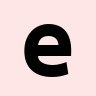

In [ ]:
# 6 images, each can be displayed
# => only 3D tensors can be displayed
ims[0]

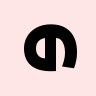

In [ ]:
# rearrange, as the name suggests, rearranges elements
# below we swapped height and width.
# In other words, transposed first two axes (dimensions)
rearrange(ims[0], "h w c -> w h c")

## Composition of axes

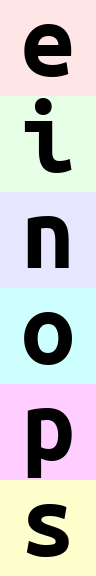

In [ ]:
# einops allows seamlessly composing batch and height to a new height dimension
# We just rendered all images by collapsing to 3d tensor!
rearrange(ims, "b h w c -> (b h) w c")

In [ ]:
x = torch.randn(3, 2)
print(x)
print(x.flatten())
# Order matters. Numerical example (visual below)
print(rearrange(x, "h w -> (h w)"))
print(rearrange(x, "h w -> (w h)"))

tensor([[ 0.1218, -0.6989],
        [-0.6698, -0.2974],
        [-0.1376, -1.1516]])
tensor([ 0.1218, -0.6989, -0.6698, -0.2974, -0.1376, -1.1516])
tensor([ 0.1218, -0.6989, -0.6698, -0.2974, -0.1376, -1.1516])
tensor([ 0.1218, -0.6698, -0.1376, -0.6989, -0.2974, -1.1516])


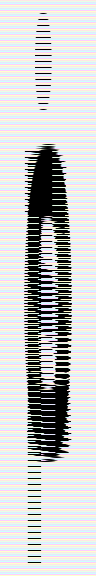

In [ ]:
rearrange(ims, "b h w c -> (h b) w c")

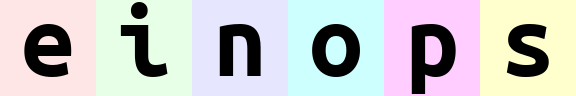

In [ ]:
# or compose a new dimension of batch and width
rearrange(ims, "b h w c -> h (b w) c")

In [ ]:
# resulting dimensions are computed very simply
# length of newly composed axis is a product of components
# [6, 96, 96, 3] -> [96, (6 * 96), 3]
rearrange(ims, "b h w c -> h (b w) c").shape

(96, 576, 3)

In [ ]:
# we can compose more than two axes.
# let's flatten 4d array into 1d, resulting array has as many elements as the original
rearrange(ims, "b h w c -> (b h w c)").shape

(165888,)

## Decomposition of axis

In [ ]:
# decomposition is the inverse process - represent an axis as a combination of new axes
# several decompositions possible, so b1=2 is to decompose 6 to b1=2 and b2=3
rearrange(ims, "(b1 b2) h w c -> b1 b2 h w c ", b1=2).shape

(2, 3, 96, 96, 3)

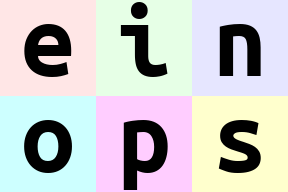

In [ ]:
# finally, combine composition and decomposition:
rearrange(ims, "(b1 b2) h w c -> (b1 h) (b2 w) c ", b1=2)

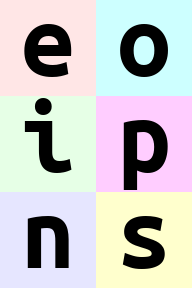

In [ ]:
# slightly different composition: b1 is merged with width, b2 with height
# ... so letters are ordered by w then by h
rearrange(ims, "(b1 b2) h w c -> (b2 h) (b1 w) c ", b1=2)

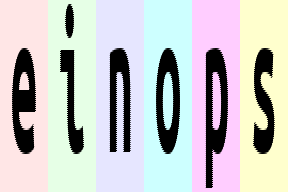

In [ ]:
# move part of width dimension to height.
# we should call this width-to-height as image width shrunk by 2 and height doubled.
# but all pixels are the same!
# Can you write reverse operation (height-to-width)?
rearrange(ims, "b h (w w2) c -> (h w2) (b w) c", w2=2)

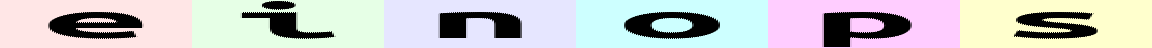

In [ ]:
rearrange(ims, "b (h h2) w c -> h (b w h2) c", h2=2)

## Order of axes matters

In [ ]:
x = torch.randn(4, 2)
print(x)
# Numerical example (visual below)
print(rearrange(x, "(h h2) w -> h (w h2)", h2=2))
print(rearrange(x, "(h h2) w -> h (h2 w)", h2=2))

tensor([[-3.8063, -0.1150],
        [-0.4665, -0.2939],
        [ 0.7777, -1.3395],
        [ 0.8639,  1.1261]])
tensor([[-3.8063, -0.4665, -0.1150, -0.2939],
        [ 0.7777,  0.8639, -1.3395,  1.1261]])
tensor([[-3.8063, -0.1150, -0.4665, -0.2939],
        [ 0.7777, -1.3395,  0.8639,  1.1261]])


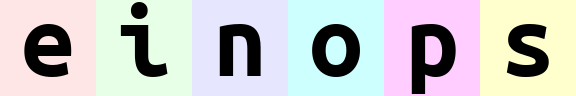

In [ ]:
# compare with the next example
rearrange(ims, "b h w c -> h (b w) c")

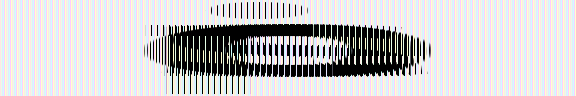

In [ ]:
# order of axes in composition is different
# rule is just as for digits in the number: leftmost digit is the most significant,
# while neighboring numbers differ in the rightmost axis.

# you can also think of this as lexicographic sort
rearrange(ims, "b h w c -> h (w b) c")

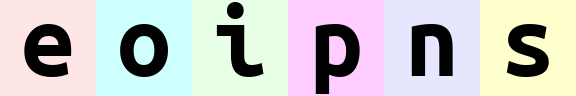

In [ ]:
# what if b1 and b2 are reordered before composing to width?
rearrange(ims, "(b1 b2) h w c -> h (b1 b2 w) c ", b1=2)  # produces 'einops'
rearrange(ims, "(b1 b2) h w c -> h (b2 b1 w) c ", b1=2)  # produces 'eoipns'

## Meet einops.reduce

In einops-land you don't need to guess what happened
```python
x.mean(-1)
```
Because you write what the operation does
```python
reduce(x, 'b h w c -> b h w', 'mean')
```

if axis is not present in the output — you guessed it — axis was reduced.

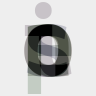

In [ ]:
# average over batch
reduce(ims, "b h w c -> h w c", "mean")

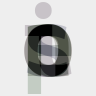

In [ ]:
# the previous is identical to familiar:
ims.mean(axis=0)
# but is so much more readable

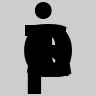

In [ ]:
# Example of reducing of several axes
# besides mean, there are also min, max, sum, prod
reduce(ims, "b h w c -> h w", "min")

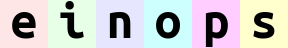

In [ ]:
# this is mean-pooling with 2x2 kernel
# image is split into 2x2 patches, each patch is averaged
reduce(ims, "b (h h2) (w w2) c -> h (b w) c", "mean", h2=2, w2=2)

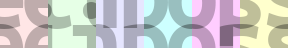

In [ ]:
# order is still important
# make sure the dim you reduce is the rightmost in the group
# if you want nearby pixels to be pooled together
reduce(ims, "b (h2 h) (w2 w) c -> h (b w) c", "mean", h2=2, w2=2)
# explanation: the pooling is done between 4 disconnected pixels that are h/2 apart and w/2 apart

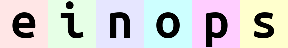

In [ ]:
# max-pooling is similar
# result is not as smooth as for mean-pooling
reduce(ims, "b (h h2) (w w2) c -> h (b w) c", "max", h2=2, w2=2)

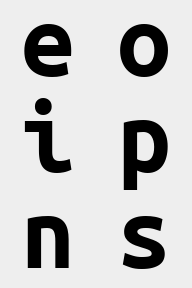

In [ ]:
# yet another example. Can you compute result shape?
reduce(ims, "(b1 b2) h w c -> (b2 h) (b1 w)", "mean", b1=2)

## Stack and concatenate

In [ ]:
# rearrange can also take care of lists of arrays with the same shape
x = list(ims)
print(type(x), "with", len(x), "tensors of shape", x[0].shape)
# that's how we can stack inputs
# "list axis" becomes first ("b" in this case), and we left it there
rearrange(x, "b h w c -> b h w c").shape

<class 'list'> with 6 tensors of shape (96, 96, 3)


(6, 96, 96, 3)

In [ ]:
# but new axis can appear in the other place:
rearrange(x, "b h w c -> h w c b").shape

(96, 96, 3, 6)

In [ ]:
# that's equivalent to np stacking, but written more explicitly
np.array_equal(rearrange(x, "b h w c -> h w c b"), np.stack(x, axis=3))

True

In [ ]:
# ... or we can concatenate along axes
rearrange(x, "b h w c -> h (b w) c").shape

(96, 576, 3)

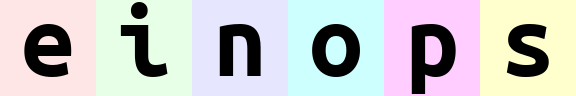

In [ ]:
rearrange(x, "b h w c -> h (b w) c")

In [ ]:
# which is equivalent to concatenation
np.array_equal(rearrange(x, "b h w c -> h (b w) c"), np.concatenate(x, axis=1))

True

## Addition or removal of axes

You can write 1 to create a new axis of length 1. Similarly you can remove such axis.

There is also a synonym `()` that you can use. That's a composition of zero axes and it also has a unit length.

In [ ]:
x = rearrange(ims, "b h w c -> b 1 h w 1 c")  # functionality of np.expand_dims
print(x.shape)
print(rearrange(x, "b 1 h w 1 c -> b h w c").shape)  # functionality of np.squeeze

(6, 1, 96, 96, 1, 3)
(6, 96, 96, 3)


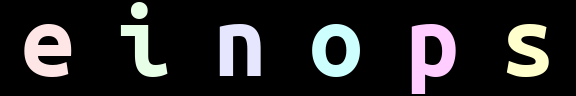

In [ ]:
# compute max in each image individually, then show a difference
x = reduce(ims, "b h w c -> b () () c", "max") - ims
rearrange(x, "b h w c -> h (b w) c")

In [ ]:
print(reduce(ims, "b h w c -> b () () c", "mean").shape)
print(reduce(ims, "b h w c -> b 1 1 c", "mean").shape)
print(reduce(ims, "b h w c -> b c", "mean").shape)

(6, 1, 1, 3)
(6, 1, 1, 3)
(6, 3)


## Repeating elements

Third operation we introduce is `repeat`

In [ ]:
# repeat along a new axis. New axis can be placed anywhere
repeat(ims[0], "h w c -> h new_axis w c", new_axis=5).shape

(96, 5, 96, 3)

In [ ]:
# shortcut
repeat(ims[0], "h w c -> h 5 w c").shape

(96, 5, 96, 3)

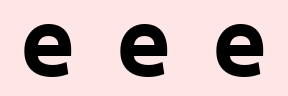

In [ ]:
# repeat along w (existing axis)
repeat(ims[0], "h w c -> h (repeat w) c", repeat=3)

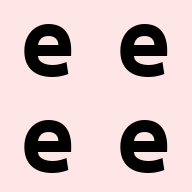

In [ ]:
# repeat along two existing axes
repeat(ims[0], "h w c -> (2 h) (2 w) c")

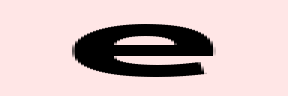

In [ ]:
# order of axes matters as usual - you can repeat each element (pixel) 3 times
# by changing order in parenthesis
repeat(ims[0], "h w c -> h (w repeat) c", repeat=3)

Note: `repeat` operation covers functionality identical to `np.repeat`, `np.tile` and actually more than that.

In [ ]:
repeat(torch.tensor([1, 2, 3]), "n -> (n repeat)", repeat=2)

tensor([1, 1, 2, 2, 3, 3])

In [ ]:
# Newer versions of einops are more efficient and share memory with the original tensor
x = torch.randn(3)
print(x)

y = repeat(x, "c -> 4 c")
print(y)

x[0] = 999
print(x)
print(y)

tensor([-0.4055,  1.3975, -0.6590])
tensor([[-0.4055,  1.3975, -0.6590],
        [-0.4055,  1.3975, -0.6590],
        [-0.4055,  1.3975, -0.6590],
        [-0.4055,  1.3975, -0.6590]])
tensor([ 9.9900e+02,  1.3975e+00, -6.5897e-01])
tensor([[ 9.9900e+02,  1.3975e+00, -6.5897e-01],
        [ 9.9900e+02,  1.3975e+00, -6.5897e-01],
        [ 9.9900e+02,  1.3975e+00, -6.5897e-01],
        [ 9.9900e+02,  1.3975e+00, -6.5897e-01]])


## Reduce ⇆ repeat

reduce and repeat are like opposite of each other: first one reduces amount of elements, second one increases.

In the following example each image is repeated first, then we reduce over new axis to get back original tensor. Notice that operation patterns are "reverse" of each other

# Ellipses to ignore unused dimensions

In [ ]:
repeated = repeat(ims, "b h w c -> b h new_axis w c", new_axis=2)
reduced = reduce(repeated, "b h new_axis w c -> b h w c", "min")
assert np.array_equal(ims, reduced)

In [ ]:
x = torch.randn(3, 100, 120, 150)
rearrange(x, "... w c -> ... c w").shape

torch.Size([3, 100, 150, 120])

Also check out https://github.com/arogozhnikov/einops/blob/main/docs/2-einops-for-deep-learning.ipynb and https://einops.rocks/pytorch-examples.html